<a href="https://colab.research.google.com/github/umak1106/Sumoylation/blob/main/Sumonet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sumonet

In [2]:
from sumonet.utils.data_pipe import Data
data = Data()
X_train, y_train, X_test, y_test = data.load_sumonet_experiment_data()

In [3]:
from sumonet.utils.encodings import Encoding
encoder = Encoding(encoderType='one-hot')
X_train_encoded = encoder.encode_data(X_train)

In [4]:
import numpy as np
y_train = np.asarray(y_train)
y_train = (y_train[:,None] == np.arange(2)).astype(int)

In [5]:
from sumonet.model.architecture import SUMOnet
model = SUMOnet(input_shape = X_train_encoded.shape[1:] )
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train_encoded,y_train,epochs=3)

Epoch 1/3
598/598 [==============================] - 40s 46ms/step - loss: 0.5048 - accuracy: 0.7725
Epoch 2/3
598/598 [==============================] - 15s 25ms/step - loss: 0.4597 - accuracy: 0.7993
Epoch 3/3
598/598 [==============================] - 15s 25ms/step - loss: 0.4446 - accuracy: 0.8073


In [6]:
from sumonet.model.architecture import SUMOnet
SUMOnet3_model = SUMOnet()
SUMOnet3_model.load_weights()


This model was trained on entire (Train + Test) data! If you want to use model that was trained on only Train samples please use load_weights(model_state='on_train_data')


In [7]:
encoder = Encoding(encoderType='blosum62')
X_test_encoded = encoder.encode_data(X_test)
y_preds = SUMOnet3_model.predict(X_test_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


67/67 [==============================] - 1s 6ms/step


In [8]:

from sklearn import metrics

def f1_score(y_true, y_probs):

    return metrics.f1_score(y_true, y_probs.argmax(-1))

def mcc(y_true, y_probs):

    return metrics.matthews_corrcoef(y_true, y_probs.argmax(-1))

def rocAuc_score(y_true, y_probs):

    lr_fpr, lr_tpr, _ = metrics.roc_curve(y_true, y_probs[:,1])

    return metrics.auc(lr_fpr, lr_tpr)

def aupr_score(y_true, y_probs):

    precision, recall, _ = metrics.precision_recall_curve(y_true, y_probs[:,1])

    return metrics.auc(recall, precision)

def evaluate(y_true, y_probs, metrics_):



    metricsDict = {'f1':f1_score, 'mcc':mcc, 'roc':rocAuc_score, 'aupr':aupr_score}
    outputEval = {}

    if type(metrics_) == str:

        if metrics_.lower() not in metricsDict:

                raise ValueError(f"{metrics_.lower()} is not supported! f1, mcc, roc and aupr are supported evaluation metrics")

        else:

            outputEval[metrics_.lower()]  = metricsDict[metrics_.lower()](y_true, y_probs)

        return outputEval

    elif type(metrics_) == list:

        metricNames = [x.lower() for x in metrics_]

        for metricName in metricNames:

            if metricName not in metricsDict:

                raise ValueError(f"{metricName} is not supported! f1, mcc, roc and aupr are supported evaluation metrics")

            else:

                outputEval[metricName]  = metricsDict[metricName](y_true, y_probs)

        return outputEval

    else:

        raise TypeError("metrics must be a string or list of strings")


In [9]:

y_test = np.asarray(y_test)
y_test = (y_test[:,None] == np.arange(2)).astype(int)
y_test
f1_score = evaluate(y_test.argmax(-1),y_preds,'f1')


In [10]:
mcc = evaluate(y_test.argmax(-1),y_preds,'mcc')
roc = evaluate(y_test.argmax(-1),y_preds,'roc')
aupr = evaluate(y_test.argmax(-1),y_preds,'aupr')

In [13]:
print(f1_score)
print(mcc)
print(roc)
print(aupr)

{'f1': 0.7033707865168539}
{'mcc': 0.6417148350883615}
{'roc': 0.9109111989573554}
{'aupr': 0.824123537044848}


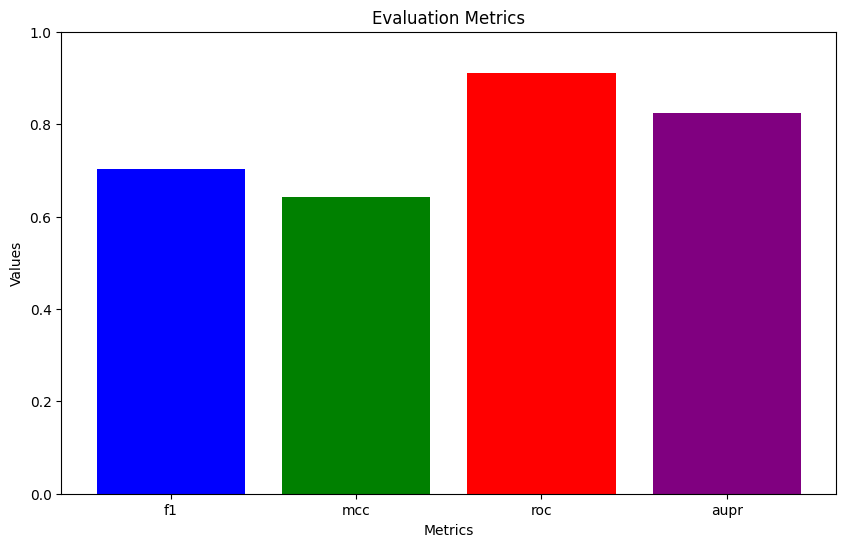

In [14]:
import matplotlib.pyplot as plt


evaluation_results = {
    'f1': 0.7033707865168539,
    'mcc': 0.6417148350883615,
    'roc': 0.9109111989573554,
    'aupr': 0.824123537044848
}


metric_names = list(evaluation_results.keys())
metric_values = list(evaluation_results.values())


plt.figure(figsize=(10, 6))
plt.bar(metric_names, metric_values, color=['blue', 'green', 'red', 'purple'])  # Customize colors as needed
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)
plt.show()
